In [1]:
"""
This example shows how to fit a model and evaluate its predictions.
"""
import pprint

from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.evaluation import make_evaluation_predictions, Evaluator
from gluonts.model.simple_feedforward import SimpleFeedForwardEstimator
from gluonts.mx.trainer import Trainer

/mnt/01D7B0AB8D0B4060/gluon-ts/src/gluonts/mx/trainer/learning_rate_scheduler.py:68: RuntimeWarning: fields may not start with an underscore, ignoring "_current_patience"
  class Patience:
/mnt/01D7B0AB8D0B4060/gluon-ts/src/gluonts/model/simple_feedforward/__init__.py:18: FutureWarning: The module gluonts.model.simple_feedforward has been moved to gluonts.mx.model.simple_feedforward. In GluonTS v0.12 it will be no longer possible to use the old path. Try to use 'from gluonts.mx import SimpleFeedForwardEstimator'.
  warnings.warn(


In [2]:
print(f"datasets available: {dataset_recipes.keys()}")

# we pick m4_hourly as it only contains a few hundred time series
dataset = get_dataset("m4_hourly", regenerate=False)

estimator = SimpleFeedForwardEstimator(
    prediction_length=dataset.metadata.prediction_length,
    trainer=Trainer(epochs=5, num_batches_per_epoch=15),
)

datasets available: dict_keys(['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips', 'solar_nips', 'wiki-rolling_nips', 'taxi_30min', 'kaggle_web_traffic_with_missing', 'kaggle_web_traffic_without_missing', 'kaggle_web_traffic_weekly', 'm1_yearly', 'm1_quarterly', 'm1_monthly', 'nn5_daily_with_missing', 'nn5_daily_without_missing', 'nn5_weekly', 'tourism_monthly', 'tourism_quarterly', 'tourism_yearly', 'cif_2016', 'london_smart_meters_without_missing', 'wind_farms_without_missing', 'car_parts_without_missing', 'dominick', 'fred_md', 'pedestrian_counts', 'hospital', 'covid_deaths', 'kdd_cup_2018_without_missing', 'weather', 'm3_monthly', 'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5', 'uber_tlc_daily', 'uber_tlc_hourly', 'airpassengers'])


In [3]:
predictor = estimator.train(dataset.train)

[14:49:56] ../src/base.cc:79: cuDNN lib mismatch: linked-against version 8201 != compiled-against version 8101.  Set MXNET_CUDNN_LIB_CHECKING=0 to quiet this warning.
100%|██████████| 15/15 [00:00<00:00, 186.47it/s, epoch=5/5, avg_epoch_loss=4.21]


In [4]:
#predictor = estimator.train(dataset.train)

forecast_it, ts_it = make_evaluation_predictions(
    dataset.test, predictor=predictor, num_samples=7
)

In [5]:
result_ls = list(forecast_it)

In [6]:
len(result_ls)

414

In [7]:
for i in range(len(result_ls)):
    print(result_ls[i])

gluonts.model.forecast.SampleForecast(info=None, item_id="0", samples=numpy.array([[667.3594360351562, 633.3282470703125, 629.4664306640625, 480.0321044921875, 497.0219421386719, 374.3924255371094, 544.6166381835938, 496.2341003417969, 550.5294189453125, 498.72021484375, 330.9508361816406, 751.8995361328125, 678.2811279296875, 969.380126953125, 903.5533447265625, 717.7634887695312, -365.935546875, 853.786865234375, 853.6516723632812, 797.7349243164062, 669.1354370117188, 730.7769775390625, 801.7924194335938, 497.8182678222656, 693.3025512695312, 593.26123046875, 583.2345581054688, 494.38604736328125, 398.090087890625, 566.2763061523438, 414.5742492675781, 532.6489868164062, 524.0245971679688, 554.0120239257812, 464.2481994628906, 676.9109497070312, 690.618408203125, 732.8678588867188, 1041.149658203125, 715.6782836914062, 891.7074584960938, 961.4755249023438, 582.1641845703125, 913.3287353515625, 479.80718994140625, 823.0300903320312, 713.7717895507812, 701.2324829101562], [641.7201538

In [8]:
result_ls[0].samples.shape

(7, 48)

In [9]:
result_ls[1].samples

array([[ 3393.4734,  2770.6768,  2686.791 ,  1917.1984,  2286.0806,
         1813.6646,  1896.1141,  2124.7712,  1846.1812,  2900.8535,
         2561.6208,  1797.7277,  2922.3716,  3792.0356,  3464.9932,
         3802.5037,  4161.8877,  3803.6917,  3762.3096,  3104.9753,
         3766.0518,  3758.0256,  3353.1482,  3092.5042,  3029.0525,
         2521.6306,  2672.1367,  2702.0215,  1905.5066,  1974.3926,
         1972.8293,  2605.4473,  2429.1748,  2784.1462,  2380.6987,
         3127.1277,  2508.486 ,  3324.1907,  3667.317 ,  3957.1694,
         3575.424 ,  4258.773 ,  3209.285 ,  3951.3953,  3622.595 ,
         3271.501 ,  4009.5693,  2747.158 ],
       [ 2665.008 ,  2454.6902,  2864.363 ,  2048.152 ,  1259.9564,
         2998.3477,  1002.5993,  2274.184 ,  2130.432 ,  2060.634 ,
         2111.6052,  3670.342 ,  2589.5242, -3023.2102,  4140.954 ,
         3335.1848,  3642.0037,  3641.758 ,  3294.544 ,  3698.7427,
         3672.0051,  3690.3838,  3110.9502,  3489.0767,  2945.92  ,
   

In [10]:
result_ls[0].samples[0]

array([ 667.35944,  633.32825,  629.46643,  480.0321 ,  497.02194,
        374.39243,  544.61664,  496.2341 ,  550.5294 ,  498.7202 ,
        330.95084,  751.89954,  678.2811 ,  969.3801 ,  903.55334,
        717.7635 , -365.93555,  853.78687,  853.6517 ,  797.7349 ,
        669.13544,  730.777  ,  801.7924 ,  497.81827,  693.30255,
        593.2612 ,  583.23456,  494.38605,  398.0901 ,  566.2763 ,
        414.57425,  532.649  ,  524.0246 ,  554.012  ,  464.2482 ,
        676.91095,  690.6184 ,  732.86786, 1041.1497 ,  715.6783 ,
        891.70746,  961.4755 ,  582.1642 ,  913.32874,  479.8072 ,
        823.0301 ,  713.7718 ,  701.2325 ], dtype=float32)

In [11]:
result_ls[0].samples[1]

array([ 641.72015,  386.78403,  496.4422 ,  556.9066 ,  681.4512 ,
        413.27274,  611.083  ,  610.7718 ,  544.36237,  391.41086,
        541.9177 ,  556.0329 ,  792.54706, 1107.9062 ,  786.82355,
        870.65063,  907.5046 ,  815.33014,  889.38446,  876.1141 ,
        508.4104 ,  792.4173 ,  845.2242 ,  683.01074,  617.9961 ,
        559.18475,  640.2499 ,  628.2715 ,  488.83588,  453.95935,
        447.33652,  533.2672 ,  561.7163 ,  591.98   ,  676.1726 ,
        751.82086,  754.449  ,  784.4934 ,  756.4643 , 1008.04285,
        916.03625,  834.9219 ,  808.39667,  984.66754,  857.1442 ,
       1616.0559 ,  776.2508 ,  753.61774], dtype=float32)

In [12]:
result_ls[0].freq

<Hour>

In [13]:
result_ls[0].start_date

Period('1750-01-30 04:00', 'H')

In [14]:
import pandas as pd
pd.date_range(pd.to_datetime("1750-01-01"), periods=48,freq="1H")

DatetimeIndex(['1750-01-01 00:00:00', '1750-01-01 01:00:00',
               '1750-01-01 02:00:00', '1750-01-01 03:00:00',
               '1750-01-01 04:00:00', '1750-01-01 05:00:00',
               '1750-01-01 06:00:00', '1750-01-01 07:00:00',
               '1750-01-01 08:00:00', '1750-01-01 09:00:00',
               '1750-01-01 10:00:00', '1750-01-01 11:00:00',
               '1750-01-01 12:00:00', '1750-01-01 13:00:00',
               '1750-01-01 14:00:00', '1750-01-01 15:00:00',
               '1750-01-01 16:00:00', '1750-01-01 17:00:00',
               '1750-01-01 18:00:00', '1750-01-01 19:00:00',
               '1750-01-01 20:00:00', '1750-01-01 21:00:00',
               '1750-01-01 22:00:00', '1750-01-01 23:00:00',
               '1750-01-02 00:00:00', '1750-01-02 01:00:00',
               '1750-01-02 02:00:00', '1750-01-02 03:00:00',
               '1750-01-02 04:00:00', '1750-01-02 05:00:00',
               '1750-01-02 06:00:00', '1750-01-02 07:00:00',
               '1750-01-

In [15]:
gluonts_result = result_ls

In [16]:
import pandas as pd 
from sktime.datatypes import convert_to


instance_no = len(gluonts_result)
global_ls = []
per_instance_ls = []
columns = []
validation_no = gluonts_result[0].samples.shape[0]
    


In [17]:
gluonts_result[0].start_date.to_timestamp()

Timestamp('1750-01-30 04:00:00')

In [18]:
for i in range(instance_no):
    
    period = gluonts_result[i].samples.shape[1]
    start_date = gluonts_result[i].start_date.to_timestamp()
    freq = gluonts_result[i].freq
    ts_index = pd.date_range(start = start_date, periods = period, freq = freq)
    per_instance_ls = [pd.Series(data=gluonts_result[i].samples[j], index = ts_index) for j in range(validation_no)]
    global_ls.append(per_instance_ls)

for k in range(validation_no):
    columns.append("validation_" + str(k))

nested_univ = pd.DataFrame(global_ls, columns=columns)
    

In [19]:
def convert_gluonts_result_to_multiindex(gluonts_result):
    """
    Convert the output of Gluonts's prediction to a multiindex dataframe 
    compatible with sktime

    Parameters
    ----------
    gluonts_result: The first element of the tuple resulting 
    from running `make_evaluation_predictions`.
        For example in Eg: 
        forecast_it, ts_it = make_evaluation_predictions()
        gluonts_result = forecast_it
    
    Returns
    -------
    A MultiIndex DF mtype type compatible with sktime

    """
    
    import pandas as pd 
    from sktime.datatypes import convert_to


    instance_no = len(gluonts_result)
    global_ls = []
    per_instance_ls = []
    columns = []
    validation_no = gluonts_result[0].samples.shape[0]
    
    for i in range(instance_no):
        
        period = gluonts_result[i].samples.shape[1]
        start_date = gluonts_result[i].start_date.to_timestamp()
        freq = gluonts_result[i].freq
        ts_index = pd.date_range(start = start_date, periods = period, freq = freq)
        per_instance_ls = [pd.Series(data=gluonts_result[i].samples[j], index = ts_index) for j in range(validation_no)]
        global_ls.append(per_instance_ls)

    for k in range(validation_no):
        columns.append("result_" + str(k))
    
    nested_univ = pd.DataFrame(global_ls, columns=columns)
    
    return convert_to(nested_univ, to_type="pd-multiindex")

In [20]:
convert_gluonts_result_to_multiindex(result_ls)

result_0    result_1    result_2    result_3  \
instances timepoints                                                            
0         1750-01-30 04:00:00  667.359436  641.720154  818.810974  609.875183   
          1750-01-30 05:00:00  633.328247  386.784027  536.936340  462.453186   
          1750-01-30 06:00:00  629.466431  496.442200  551.473145  688.101807   
          1750-01-30 07:00:00  480.032104  556.906616  493.236023  492.884216   
          1750-01-30 08:00:00  497.021942  681.451172  558.686523  398.385040   
...                                   ...         ...         ...         ...   
413       1750-02-11 19:00:00  121.100777   85.568787   81.547066   81.934273   
          1750-02-11 20:00:00   78.998627  107.238449   80.059814   58.969315   
          1750-02-11 21:00:00   10.816293   65.680832   40.965645   61.766151   
          1750-02-11 22:00:00   49.453495   54.117847   55.512512   40.144943   
          1750-02-11 23:00:00   18.479263   45.020206   31.624044   36.487553   

                                 result_4    result_5    result_6  
instances timepoints                                               
0         1750-01-30 04:00:00  710.023438  506.296234  683.691589  
          1750-01-30 05:00:00  623.104553  540.126770  602.583069  
          1750-01-30 06:00:00  650.304382  550.582275  558.204285  
          1750-01-30 07:00:00  587.477783  458.062531  636.680054  
          1750-01-30 08:00:00  572.377380  468.256714  447.618683  
...                                   ...         ...         ...  
413       1750-02-11 19:00:00   81.769737   64.568481   61.101746  
          1750-02-11 20:00:00   76.042542   51.165932   82.025932  
          1750-02-11 21:00:00   67.025284   58.314747   60.470577  
          1750-02-11 22:00:00   16.749792   65.930389   53.839539  
          1750-02-11 23:00:00   27.775206   29.017612   38.407028  

[19872 rows x 7 columns]

## Simple example GluonTS

/mnt/01D7B0AB8D0B4060/gluon-ts/src/gluonts/model/deepar/__init__.py:18: FutureWarning: The module gluonts.model.deepar has been moved to gluonts.mx.model.deepar. In GluonTS v0.12 it will be no longer possible to use the old path. Try to use 'from gluonts.mx import DeepAREstimator'.
  warnings.warn(
100%|██████████| 50/50 [00:01<00:00, 39.23it/s, epoch=5/5, avg_epoch_loss=3.91]


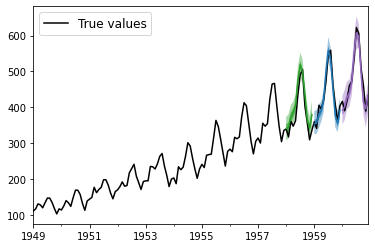

In [21]:
from gluonts.dataset.util import to_pandas
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.repository.datasets import get_dataset
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx import Trainer
import matplotlib.pyplot as plt


dataset = get_dataset("airpassengers")
deepar = DeepAREstimator(prediction_length=12, freq="M", trainer=Trainer(epochs=5))
model = deepar.train(dataset.train)

# Make predictions
true_values = to_pandas(list(dataset.test)[0])
true_values.to_timestamp().plot(color="k")
prediction_input = PandasDataset([true_values[:-36], true_values[:-24], true_values[:-12]])
predictions = model.predict(prediction_input)

for color, prediction in zip(["green", "blue", "purple"], predictions):
    prediction.plot(color=f"tab:{color}")

plt.legend(["True values"], loc="upper left", fontsize="large")


In [22]:
from gluonts.dataset.util import to_pandas
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.repository.datasets import get_dataset
from gluonts.mx.model.simple_feedforward import SimpleFeedForwardEstimator
from gluonts.mx import Trainer
import matplotlib.pyplot as plt
from sktime.datatypes._adapter import convert_gluonts_result_to_multiindex

dataset = get_dataset("airpassengers")
deepar = SimpleFeedForwardEstimator(prediction_length=12, trainer=Trainer(epochs=5))
model = deepar.train(dataset.train)

# Make predictions
true_values = to_pandas(list(dataset.test)[0])
prediction_input = PandasDataset(true_values[:-12])
predictions = model.predict(prediction_input)

#for color, prediction in zip(["green"], predictions):
#    prediction.plot(color=f"tab:{color}")

#plt.legend(["True values"], loc="upper left", fontsize="large")

100%|██████████| 50/50 [00:00<00:00, 201.03it/s, epoch=5/5, avg_epoch_loss=4.21]


In [23]:
result_ls = list(predictions)

In [24]:
result_ls

[gluonts.model.forecast.SampleForecast(info=None, item_id=None, samples=numpy.array([[430.2601318359375, 378.45196533203125, 476.7413635253906, 493.79241943359375, 466.9391174316406, 530.5452880859375, 556.9816284179688, 616.711181640625, 533.8605346679688, 478.6502990722656, 416.8882751464844, 413.72369384765625], [388.9759521484375, 410.8570251464844, 491.198974609375, 453.4114074707031, 467.2002868652344, 537.3325805664062, 661.4673461914062, 580.28369140625, 500.3563537597656, 473.8219909667969, 424.09075927734375, 365.4356384277344], [412.437744140625, 478.4468688964844, 461.1204833984375, 493.0773010253906, 495.7994689941406, 533.370849609375, 652.6272583007812, 606.9016723632812, 561.6636352539062, 498.7583923339844, 483.4183349609375, 412.7806396484375], [397.3883361816406, 411.53790283203125, 485.7195129394531, 467.13427734375, 461.45672607421875, 527.7168579101562, 608.868408203125, 702.524658203125, 549.0974731445312, 489.68115234375, 423.6302795410156, 448.70721435546875], 

In [25]:
result_ls

[gluonts.model.forecast.SampleForecast(info=None, item_id=None, samples=numpy.array([[430.2601318359375, 378.45196533203125, 476.7413635253906, 493.79241943359375, 466.9391174316406, 530.5452880859375, 556.9816284179688, 616.711181640625, 533.8605346679688, 478.6502990722656, 416.8882751464844, 413.72369384765625], [388.9759521484375, 410.8570251464844, 491.198974609375, 453.4114074707031, 467.2002868652344, 537.3325805664062, 661.4673461914062, 580.28369140625, 500.3563537597656, 473.8219909667969, 424.09075927734375, 365.4356384277344], [412.437744140625, 478.4468688964844, 461.1204833984375, 493.0773010253906, 495.7994689941406, 533.370849609375, 652.6272583007812, 606.9016723632812, 561.6636352539062, 498.7583923339844, 483.4183349609375, 412.7806396484375], [397.3883361816406, 411.53790283203125, 485.7195129394531, 467.13427734375, 461.45672607421875, 527.7168579101562, 608.868408203125, 702.524658203125, 549.0974731445312, 489.68115234375, 423.6302795410156, 448.70721435546875], 

In [26]:
convert_gluonts_result_to_multiindex(result_ls)

result_0    result_1    result_2    result_3  \
instances timepoints                                                   
0         1960-01-31  430.260132  388.975952  412.437744  397.388336   
          1960-02-29  378.451965  410.857025  478.446869  411.537903   
          1960-03-31  476.741364  491.198975  461.120483  485.719513   
          1960-04-30  493.792419  453.411407  493.077301  467.134277   
          1960-05-31  466.939117  467.200287  495.799469  461.456726   
          1960-06-30  530.545288  537.332581  533.370850  527.716858   
          1960-07-31  556.981628  661.467346  652.627258  608.868408   
          1960-08-31  616.711182  580.283691  606.901672  702.524658   
          1960-09-30  533.860535  500.356354  561.663635  549.097473   
          1960-10-31  478.650299  473.821991  498.758392  489.681152   
          1960-11-30  416.888275  424.090759  483.418335  423.630280   
          1960-12-31  413.723694  365.435638  412.780640  448.707214   

                        result_4    result_5    result_6    result_7  \
instances timepoints                                                   
0         1960-01-31  390.103088  392.911102  430.793335  367.253143   
          1960-02-29  418.756805  316.158966  405.099762  429.094116   
          1960-03-31  433.820496  461.261658  502.940094  405.428986   
          1960-04-30  491.271515  426.217010  461.519989  493.882141   
          1960-05-31  446.534546  491.740417  454.066467  461.271667   
          1960-06-30  553.138306  528.652222  564.657410  545.735229   
          1960-07-31  628.457825  635.003113  540.530884  602.232056   
          1960-08-31  577.765869  604.263062  606.715698  657.110229   
          1960-09-30  586.620483  519.853882  567.401611  553.346252   
          1960-10-31  492.797546  539.981750  511.246857  413.709869   
          1960-11-30  412.259766  451.502869  425.452759  350.706696   
          1960-12-31  472.682587  523.782166  458.486694  459.961273   

                        result_8    result_9  ...   result_90   result_91  \
instances timepoints                          ...                           
0         1960-01-31  395.517914  349.857483  ...  421.135468  370.742706   
          1960-02-29  463.328888  421.844971  ...  344.358917  364.720337   
          1960-03-31  480.955536  472.347626  ...  504.922394  458.771759   
          1960-04-30  436.381622  474.614502  ...  480.493744  506.762604   
          1960-05-31  462.976288  469.812592  ...  498.313019  521.097473   
          1960-06-30  533.875732  515.307617  ...  517.310913  562.981323   
          1960-07-31  621.678101  635.721252  ...  696.942810  595.477112   
          1960-08-31  616.798096  619.282776  ...  610.901123  564.148804   
          1960-09-30  518.062988  577.722168  ...  582.809387  533.979492   
          1960-10-31  519.825256  446.838989  ...  479.739838  518.801147   
          1960-11-30  418.065643  402.068848  ...  394.651672  463.487030   
          1960-12-31  416.295563  481.669434  ...  469.654144  440.514954   

                       result_92   result_93   result_94   result_95  \
instances timepoints                                                   
0         1960-01-31  505.364075  398.557037  398.667450  402.598175   
          1960-02-29  368.766876  409.417847  415.502625  406.010193   
          1960-03-31  439.480042  439.273987  441.754059  560.609253   
          1960-04-30  545.105469  565.088440  400.467773  437.681030   
          1960-05-31  401.115295  452.956085  437.601013  454.356079   
          1960-06-30  529.255310  538.073669  546.439941  541.249207   
          1960-07-31  639.984253  621.600952  610.662781  571.900513   
          1960-08-31  608.019287  623.586853  592.291016  635.353210   
          1960-09-30  556.086792  414.895355  568.992554  551.225159   
          1960-10-31  469.190155  487.433807  487.930481  529.070557   
          1960-11-30  424.968109  430.628082  425.250427  423.9

In [27]:
control_result = convert_to(convert_gluonts_result_to_multiindex(result_ls), to_type="nested_univ")

In [28]:
control_result

,result_0,result_1,result_2,result_3,result_4,result_5,result_6,result_7,result_8,result_9,...,result_90,result_91,result_92,result_93,result_94,result_95,result_96,result_97,result_98,result_99
instances,,,,,,,,,,,,,,,,,,,,,
0,1960-01-31 430.260132 1960-02-29 378.451...,1960-01-31 388.975952 1960-02-29 410.857...,1960-01-31 412.437744 1960-02-29 478.446...,1960-01-31 397.388336 1960-02-29 411.537...,1960-01-31 390.103088 1960-02-29 418.756...,1960-01-31 392.911102 1960-02-29 316.158...,1960-01-31 430.793335 1960-02-29 405.099...,1960-01-31 367.253143 1960-02-29 429.094...,1960-01-31 395.517914 1960-02-29 463.328...,1960-01-31 349.857483 1960-02-29 421.844...,...,1960-01-31 421.135468 1960-02-29 344.358...,1960-01-31 370.742706 1960-02-29 364.720...,1960-01-31 505.364075 1960-02-29 368.766...,1960-01-31 398.557037 1960-02-29 409.417...,1960-01-31 398.667450 1960-02-29 415.502...,1960-01-31 402.598175 1960-02-29 406.010...,1960-01-31 333.685211 1960-02-29 390.504...,1960-01-31 404.452393 1960-02-29 417.262...,1960-01-31 357.336884 1960-02-29 241.838...,1960-01-31 343.821503 1960-02-29 375.786...


## Begin pytest

In [29]:
import numpy as np
import pandas as pd
import pytest

#from sktime.datatypes._adapter import convert_gluonts_result_to_multiindex

N_TIMEPOINTS = [3, 5]

n_timepoints = 5
#def test_from_gluonts_to_multiindex(n_timepoints):
import numpy as np
import pandas as pd

from sktime.datatypes import convert_to
from gluonts.dataset.util import to_pandas
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.repository.datasets import get_dataset
from gluonts.mx.model.simple_feedforward import SimpleFeedForwardEstimator

from gluonts.mx import Trainer

def get_sample_gluon_result(horizon):
    dataset = get_dataset("airpassengers")
    simple_model = SimpleFeedForwardEstimator(
        prediction_length=horizon, 
        trainer=Trainer(epochs=5))
    model = simple_model.train(dataset.train)

    # Make predictions
    true_values = to_pandas(list(dataset.test)[0])
    true_values.to_timestamp()
    prediction_input = PandasDataset(true_values[:-horizon])
    predictions = model.predict(prediction_input)
    return list(predictions)
gluonts_result = get_sample_gluon_result(horizon = n_timepoints)
# Result from the converter
converter_result = convert_gluonts_result_to_multiindex(gluonts_result)
dimension_name = converter_result.columns
converter_result = convert_to(converter_result, to_type="nested_univ")
# Result from manual conversion
instance_no = len(gluonts_result)
global_ls = []
per_instance_ls = []
columns = []
validation_no = gluonts_result[0].samples.shape[0]
for i in range(instance_no):
    period = gluonts_result[i].samples.shape[1]
    start_date = gluonts_result[i].start_date.to_timestamp()
    freq = gluonts_result[i].freq
    ts_index = pd.date_range(start = start_date, periods = period, freq = freq)
    per_instance_ls = [pd.Series(data=gluonts_result[i].samples[j], index = ts_index) for j in range(validation_no)]
    global_ls.append(per_instance_ls)
for k in range(validation_no):
    columns.append("result_" + str(k))
manual_result = pd.DataFrame(global_ls, columns=columns)
    




100%|██████████| 50/50 [00:00<00:00, 197.05it/s, epoch=5/5, avg_epoch_loss=4.99]


In [30]:
convert_gluonts_result_to_multiindex(gluonts_result)

result_0    result_1    result_2    result_3  \
instances timepoints                                                   
0         1960-08-31  652.955078  664.626953  638.829651  602.282593   
          1960-09-30  639.037903  669.944336  589.224670  756.461487   
          1960-10-31  578.557556  548.496216  585.416199  549.189331   
          1960-11-30  696.884705  502.848389  567.768860  527.572388   
          1960-12-31  422.962189  556.489197  511.015320  441.546539   

                        result_4    result_5    result_6    result_7  \
instances timepoints                                                   
0         1960-08-31  661.982361  599.720886  663.874268  615.450684   
          1960-09-30  598.892395  669.931519  532.205383  671.034302   
          1960-10-31  592.909180  591.939758  555.949585  541.661255   
          1960-11-30  528.104614  567.837952  567.089233  248.070236   
          1960-12-31  558.787109  575.091187  476.865692  589.124756   

                        result_8    result_9  ...   result_90   result_91  \
instances timepoints                          ...                           
0         1960-08-31  716.875488  689.779663  ...  595.298767  519.730469   
          1960-09-30  659.244751  592.104431  ...  528.603821  640.280945   
          1960-10-31  496.412476  773.766357  ...  623.553345  815.690186   
          1960-11-30  506.421570  555.887451  ...  618.949890  460.542175   
          1960-12-31  417.482880  142.813782  ...  296.568085  452.317139   

                       result_92   result_93   result_94   result_95  \
instances timepoints                                                   
0         1960-08-31  685.172546  669.217773  626.909485  776.607849   
          1960-09-30  603.110840  680.399597  576.125610  552.449036   
          1960-10-31  317.097290  509.920929  595.636841  583.808228   
          1960-11-30  497.606201  679.697021  521.894653  543.392395   
          1960-12-31  495.954681  484.357544  683.461426  406.540558   

                       result_96   result_97   result_98    result_99  
instances timepoints                                                   
0         1960-08-31  616.969116  614.117615  623.685303   613.334778  
          1960-09-30  378.319550  596.948303  653.515625   645.339050  
          1960-10-31  647.562439  532.222961  591.099487   597.314636  
          1960-11-30  683.392151  510.450012  457.468231   601.278442  
          1960-12-31  406.177795  547.197815  376.815552  1054.785645  

[5 rows x 100 columns]

In [31]:
converter_result

,result_0,result_1,result_2,result_3,result_4,result_5,result_6,result_7,result_8,result_9,...,result_90,result_91,result_92,result_93,result_94,result_95,result_96,result_97,result_98,result_99
instances,,,,,,,,,,,,,,,,,,,,,
0,1960-08-31 652.955078 1960-09-30 639.037...,1960-08-31 664.626953 1960-09-30 669.944...,1960-08-31 638.829651 1960-09-30 589.224...,1960-08-31 602.282593 1960-09-30 756.461...,1960-08-31 661.982361 1960-09-30 598.892...,1960-08-31 599.720886 1960-09-30 669.931...,1960-08-31 663.874268 1960-09-30 532.205...,1960-08-31 615.450684 1960-09-30 671.034...,1960-08-31 716.875488 1960-09-30 659.244...,1960-08-31 689.779663 1960-09-30 592.104...,...,1960-08-31 595.298767 1960-09-30 528.603...,1960-08-31 519.730469 1960-09-30 640.280...,1960-08-31 685.172546 1960-09-30 603.110...,1960-08-31 669.217773 1960-09-30 680.399...,1960-08-31 626.909485 1960-09-30 576.125...,1960-08-31 776.607849 1960-09-30 552.449...,1960-08-31 616.969116 1960-09-30 378.319...,1960-08-31 614.117615 1960-09-30 596.948...,1960-08-31 623.685303 1960-09-30 653.515...,1960-08-31 613.334778 1960-09-30 645.3...


In [32]:
manual_result

,result_0,result_1,result_2,result_3,result_4,result_5,result_6,result_7,result_8,result_9,...,result_90,result_91,result_92,result_93,result_94,result_95,result_96,result_97,result_98,result_99
0,1960-08-31 652.955078 1960-09-30 639.037...,1960-08-31 664.626953 1960-09-30 669.944...,1960-08-31 638.829651 1960-09-30 589.224...,1960-08-31 602.282593 1960-09-30 756.461...,1960-08-31 661.982361 1960-09-30 598.892...,1960-08-31 599.720886 1960-09-30 669.931...,1960-08-31 663.874268 1960-09-30 532.205...,1960-08-31 615.450684 1960-09-30 671.034...,1960-08-31 716.875488 1960-09-30 659.244...,1960-08-31 689.779663 1960-09-30 592.104...,...,1960-08-31 595.298767 1960-09-30 528.603...,1960-08-31 519.730469 1960-09-30 640.280...,1960-08-31 685.172546 1960-09-30 603.110...,1960-08-31 669.217773 1960-09-30 680.399...,1960-08-31 626.909485 1960-09-30 576.125...,1960-08-31 776.607849 1960-09-30 552.449...,1960-08-31 616.969116 1960-09-30 378.319...,1960-08-31 614.117615 1960-09-30 596.948...,1960-08-31 623.685303 1960-09-30 653.515...,1960-08-31 613.334778 1960-09-30 645.3...


In [33]:
manual_result.loc[0, "result_1"].to_numpy()

array([664.62695, 669.94434, 548.4962 , 502.8484 , 556.4892 ],
      dtype=float32)

In [34]:
    # Perform the test
    for instance, _dim_name in manual_result.iterrows():
        for dim_no, dim in enumerate(dimension_name):
            np.testing.assert_array_equal(
                manual_result.loc[instance, dim].to_numpy(),
                converter_result.loc[instance, dim].to_numpy(),
            ) 

In [35]:
import gluonts as gl
print(gl.__version__)

0.dev0+gea52849


In [68]:
import numpy as np
import pandas as pd
import pytest

#from sktime.datatypes._adapter import convert_gluonts_result_to_multiindex

N_TIMEPOINTS = [3, 5]

n_timepoints = 5
#def test_from_gluonts_to_multiindex(n_timepoints):
import numpy as np
import pandas as pd

from sktime.datatypes import convert_to
from gluonts.dataset.util import to_pandas
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.repository.datasets import get_dataset
from gluonts.model.prophet import ProphetPredictor

from gluonts.mx import Trainer

def get_sample_gluon_result(horizon):
    dataset = get_dataset("airpassengers")
    simple_model = ProphetPredictor(
        prediction_length=horizon, 
)
    predictions = simple_model.predict(dataset)
    return list(predictions)
gluonts_result = get_sample_gluon_result(horizon = n_timepoints)
# Result from the converter
converter_result = convert_gluonts_result_to_multiindex(gluonts_result)
dimension_name = converter_result.columns
converter_result = convert_to(converter_result, to_type="nested_univ")
# Result from manual conversion
instance_no = len(gluonts_result)
global_ls = []
per_instance_ls = []
columns = []
validation_no = gluonts_result[0].samples.shape[0]
for i in range(instance_no):
    period = gluonts_result[i].samples.shape[1]
    start_date = gluonts_result[i].start_date.to_timestamp()
    freq = gluonts_result[i].freq
    ts_index = pd.date_range(start = start_date, periods = period, freq = freq)
    per_instance_ls = [pd.Series(data=gluonts_result[i].samples[j], index = ts_index) for j in range(validation_no)]
    global_ls.append(per_instance_ls)
for k in range(validation_no):
    columns.append("result_" + str(k))
manual_result = pd.DataFrame(global_ls, columns=columns)
    




TypeError: 'MetaData' object is not subscriptable

In [117]:
from gluonts.model.prophet import ProphetPredictor  
from gluonts.dataset.common import ListDataset

dataset = ListDataset(
    [
        {"target": [1, 5, 3, 4, 9, 6, 7, 8, 9, 10], "start": "2018-12-21"}
    ],
    freq="D"
)

predictor = ProphetPredictor(7)
predictions = predictor.predict(dataset,  num_samples=100)



In [116]:
for x, y in zip(dataset, predictions):
    x.to_timestamp().plot()
    y.plot(color='g', prediction_intervals=prediction_intervals)

<generator object ProphetPredictor.predict at 0x7f82906ab120>

In [100]:
from gluonts.model.prophet import ProphetPredictor  
from gluonts.dataset.common import ListDataset

dataset = ListDataset(
    [
        {"target": [1, 5, 3, 4, 9, 6, 7, 8, 9, 10], "start": "2018-12-21"}
    ],
    freq="D"
)

predictor = ProphetPredictor(7)
predictions = predictor.predict(dataset)


import pandas as pd
pd.plotting.register_matplotlib_converters()

from gluonts.dataset.util import to_pandas
from matplotlib import pyplot as plt

prediction_intervals = (50.0, 90.0)
legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

for x, y in zip(dataset, predictions):
    x.to_timestamp().plot()
    y.plot(color='g', prediction_intervals=prediction_intervals)
    plt.grid(which='both')
    plt.legend(legend, loc='upper left')

plt.show()

TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead

In [77]:
from gluonts.model.prophet import ProphetPredictor  
from gluonts.dataset.common import ListDataset

dataset = ListDataset(
    [
        {"target": [1, 5, 3, 4, 9, 6, 7, 8, 9, 10], "start": "2018-12-21"}
    ],
    freq="D"
)

predictor = ProphetPredictor(7)
predictions = predictor.predict(dataset)

In [84]:

import pandas as pd
pd.plotting.register_matplotlib_converters()

from gluonts.dataset.util import to_pandas
from matplotlib import pyplot as plt

prediction_intervals = (50.0, 90.0)
legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

for x, y in zip(dataset, predictions):
    to_pandas(x).plot()
    y.to_timestamp().plot(color='g', prediction_intervals=prediction_intervals)
    plt.grid(which='both')
    plt.legend(legend, loc='upper left')

plt.show()